# Testing Various Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Layer import Dense, Dropout
from Activation import ReLU
from Loss import CategoricalCrossEntropy
from Optimizer import SGD, Adagrad, RMSprop, Adam

In [3]:
from nnfs.datasets import spiral_data

## Goal: Classifier to Classify Spriral Data

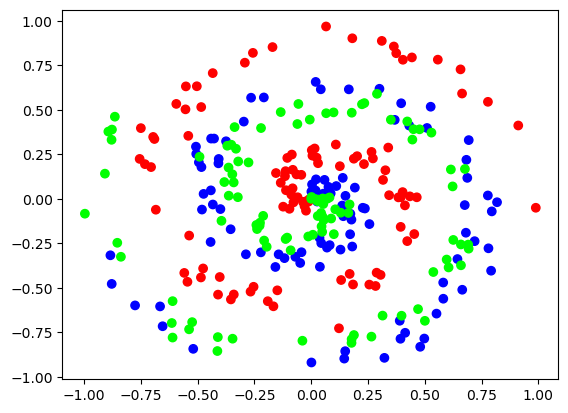

In [8]:
X, y = spiral_data(classes=3, samples=100)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [7]:
def calculate_accuracy(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis=1)
    if(len(y_true.shape) == 2):
        y_true = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_true == y_pred)
    return accuracy

## Vanilla SGD

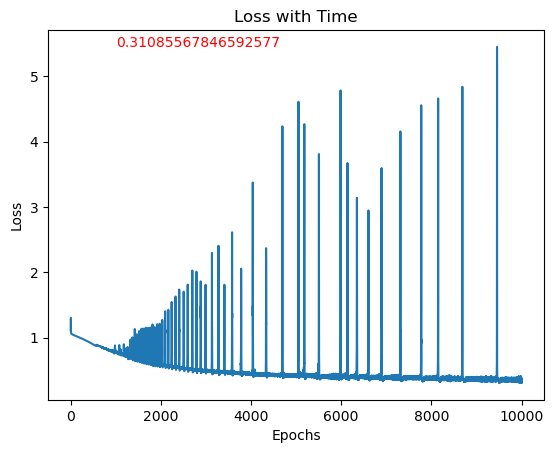

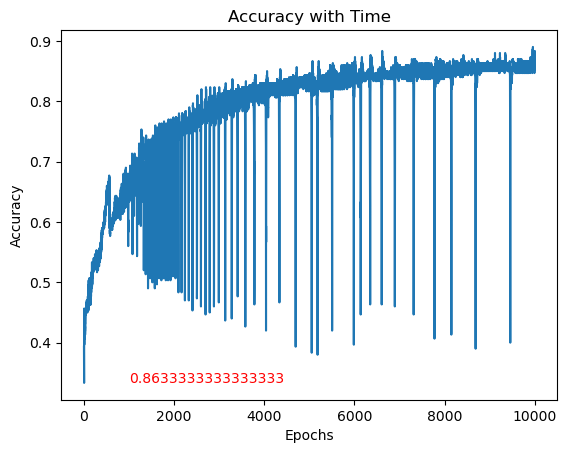

In [8]:
X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## SGD with learning rate decay

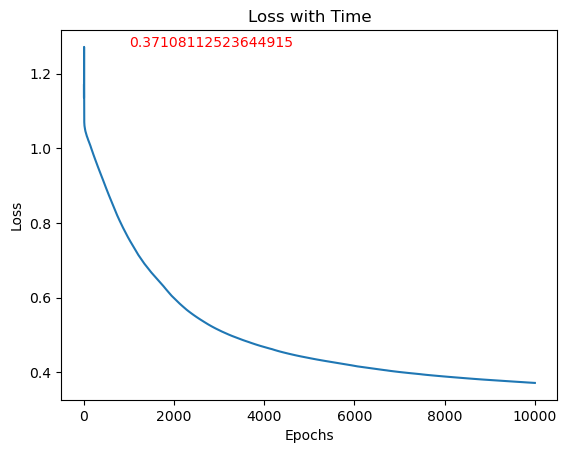

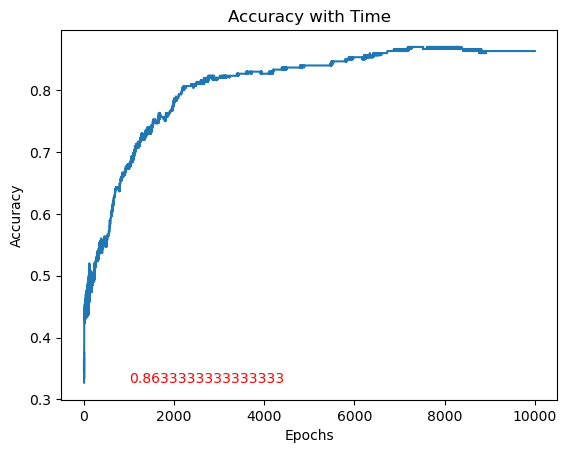

In [26]:
X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate, decay=0.001)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## SGD with Momentum

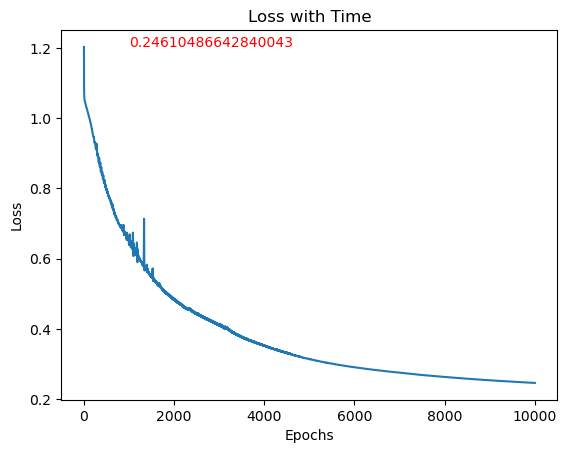

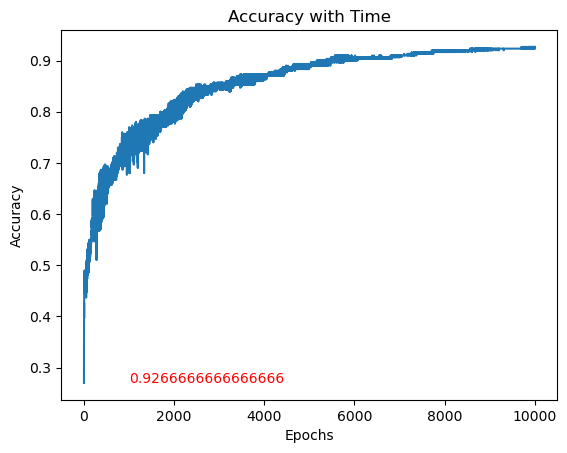

In [16]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = SGD(lr=learning_rate, decay=0.001, momentum=0.5)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Adagrad - adaptive gradient

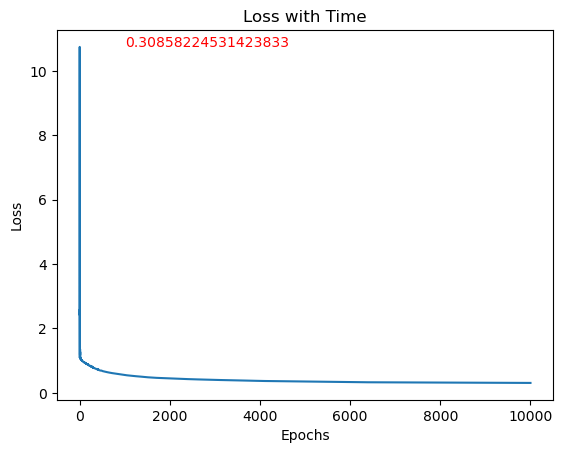

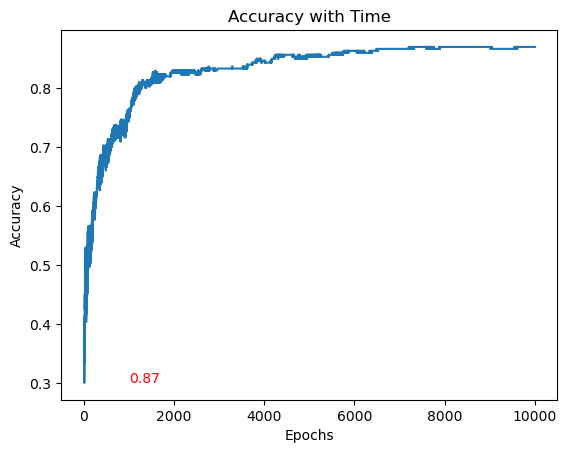

In [28]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 1
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = Adagrad(lr=learning_rate, decay=0.001)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## RMSprop

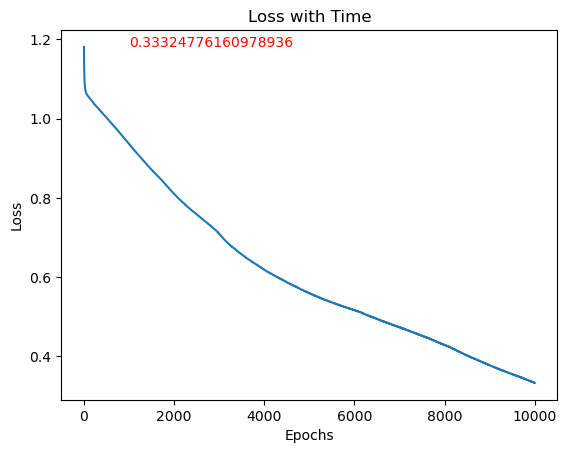

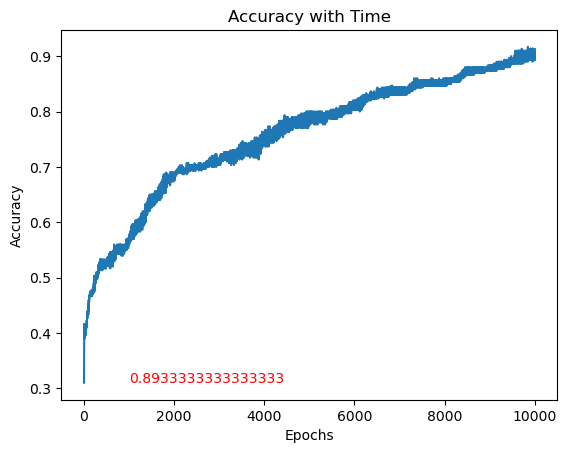

In [41]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = RMSprop(lr=learning_rate, decay=0., rho=0.9)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Adam - Adagrad + Momentum

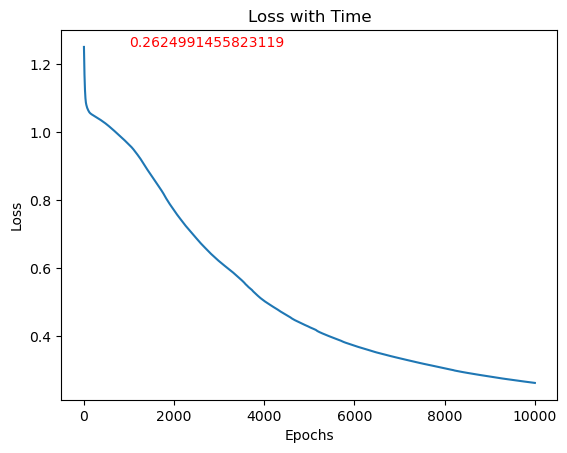

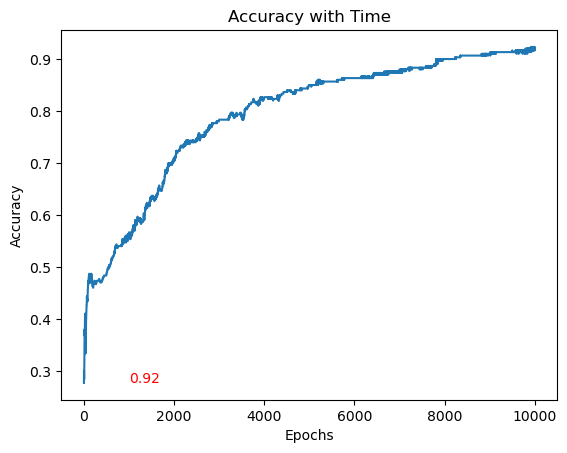

In [13]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()

dense2 = Dense(64, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Regularization
### 1. No Regularization

In [19]:
# Testing the previous model 
X_test, y_test = spiral_data(classes=3, samples=100)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss_activation.forward(dense2.output, y_test)

print("Validation")
print("loss:", loss_activation.loss_value)
print("accuracy: ", calculate_accuracy(loss_activation.output, y_test))

Validation
loss: 0.7486546259441322
accuracy:  0.7433333333333333


### 2. L1 Regularization

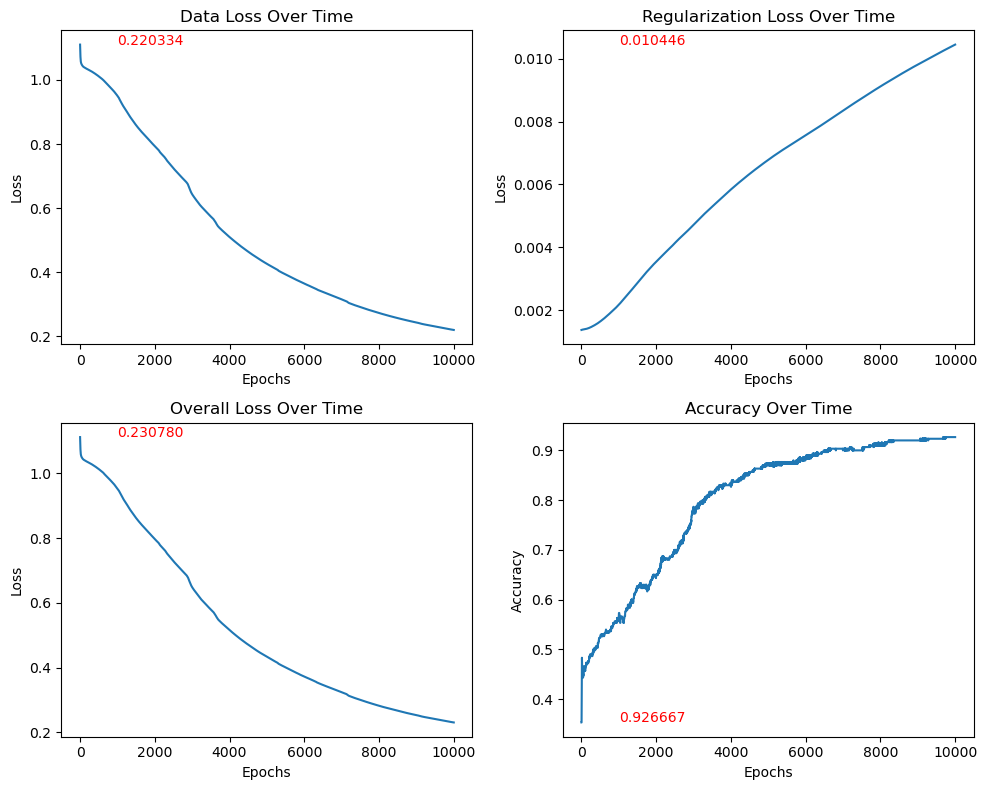

In [30]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64, weight_regularizer_l1=1e-5, bias_regularizer_l1=1e-5)
activation1 = ReLU()

dense2 = Dense(64, 3, weight_regularizer_l1=1e-5, bias_regularizer_l1=1e-5)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

data_loss_with_time = []
regularization_loss_with_time = []
overall_loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    data_loss = loss_activation.loss_value
    regularization_loss = loss_activation.loss.regularization_loss(dense1) + \
                          loss_activation.loss.regularization_loss(dense2)
    overall_loss = data_loss + regularization_loss

    data_loss_with_time.append(data_loss)
    regularization_loss_with_time.append(regularization_loss)
    overall_loss_with_time.append(overall_loss)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# --- Plot 1: Data Loss ---
axs[0, 0].plot(range(10001), data_loss_with_time)
axs[0, 0].annotate(f"{data_loss_with_time[-1]:.6f}", (1000, max(data_loss_with_time)), color='red')
axs[0, 0].set_title("Data Loss Over Time")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")

# --- Plot 2: Regularization Loss ---
axs[0, 1].plot(range(10001), regularization_loss_with_time)
axs[0, 1].annotate(f"{regularization_loss_with_time[-1]:.6f}", (1000, max(regularization_loss_with_time)), color='red')
axs[0, 1].set_title("Regularization Loss Over Time")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Loss")

# --- Plot 3: Overall Loss ---
axs[1, 0].plot(range(10001), overall_loss_with_time)
axs[1, 0].annotate(f"{overall_loss_with_time[-1]:.6f}", (1000, max(overall_loss_with_time)), color='red')
axs[1, 0].set_title("Overall Loss Over Time")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")

# --- Plot 4: Accuracy ---
axs[1, 1].plot(range(10001), accuracy_with_time)
axs[1, 1].annotate(f"{accuracy_with_time[-1]:.6f}", (1000, min(accuracy_with_time)), color='red')
axs[1, 1].set_title("Accuracy Over Time")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")

# Auto-layout to prevent overlapping
plt.tight_layout()
plt.show()

In [44]:
# Testing the model with L1 regularization 
X_test, y_test = spiral_data(classes=3, samples=100)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss_activation.forward(dense2.output, y_test)

print("validation")
print("loss:", loss_activation.loss_value)
print("accuracy: ", calculate_accuracy(loss_activation.output, y_test))

validation
loss: 0.7484202378300981
accuracy:  0.78


### 3. L2 Regularization

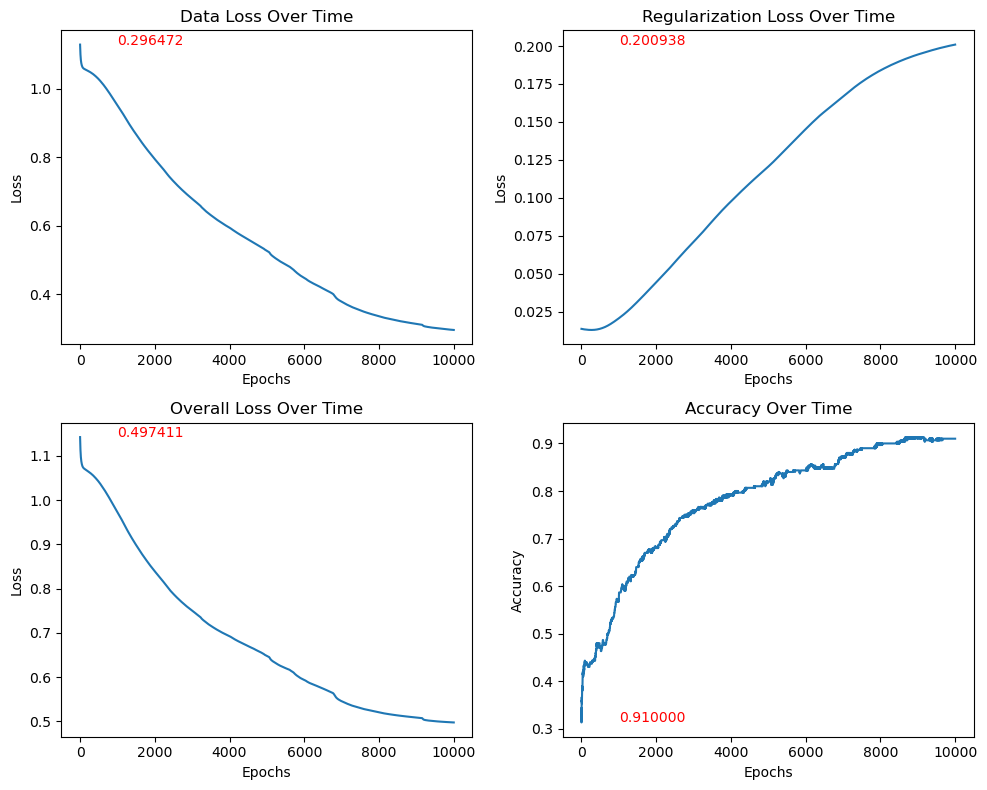

In [49]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64, weight_regularizer_l2=1e-4, bias_regularizer_l2=1e-4)
activation1 = ReLU()

dense2 = Dense(64, 3, weight_regularizer_l2=1e-4, bias_regularizer_l2=1e-4)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

data_loss_with_time = []
regularization_loss_with_time = []
overall_loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    data_loss = loss_activation.loss_value
    regularization_loss = loss_activation.loss.regularization_loss(dense1) + \
                          loss_activation.loss.regularization_loss(dense2)
    overall_loss = data_loss + regularization_loss

    data_loss_with_time.append(data_loss)
    regularization_loss_with_time.append(regularization_loss)
    overall_loss_with_time.append(overall_loss)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# --- Plot 1: Data Loss ---
axs[0, 0].plot(range(10001), data_loss_with_time)
axs[0, 0].annotate(f"{data_loss_with_time[-1]:.6f}", (1000, max(data_loss_with_time)), color='red')
axs[0, 0].set_title("Data Loss Over Time")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")

# --- Plot 2: Regularization Loss ---
axs[0, 1].plot(range(10001), regularization_loss_with_time)
axs[0, 1].annotate(f"{regularization_loss_with_time[-1]:.6f}", (1000, max(regularization_loss_with_time)), color='red')
axs[0, 1].set_title("Regularization Loss Over Time")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Loss")

# --- Plot 3: Overall Loss ---
axs[1, 0].plot(range(10001), overall_loss_with_time)
axs[1, 0].annotate(f"{overall_loss_with_time[-1]:.6f}", (1000, max(overall_loss_with_time)), color='red')
axs[1, 0].set_title("Overall Loss Over Time")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")

# --- Plot 4: Accuracy ---
axs[1, 1].plot(range(10001), accuracy_with_time)
axs[1, 1].annotate(f"{accuracy_with_time[-1]:.6f}", (1000, min(accuracy_with_time)), color='red')
axs[1, 1].set_title("Accuracy Over Time")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")

# Auto-layout to prevent overlapping
plt.tight_layout()
plt.show()

In [53]:
# Testing the new model with L2 regularization 
X_test, y_test = spiral_data(classes=3, samples=100)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss_activation.forward(dense2.output, y_test)

print("validation")
print("loss:", loss_activation.loss_value)
print("accuracy: ", calculate_accuracy(loss_activation.output, y_test))

validation
loss: 0.4462114139995503
accuracy:  0.8333333333333334


### 4. L1 + L2 Regularization

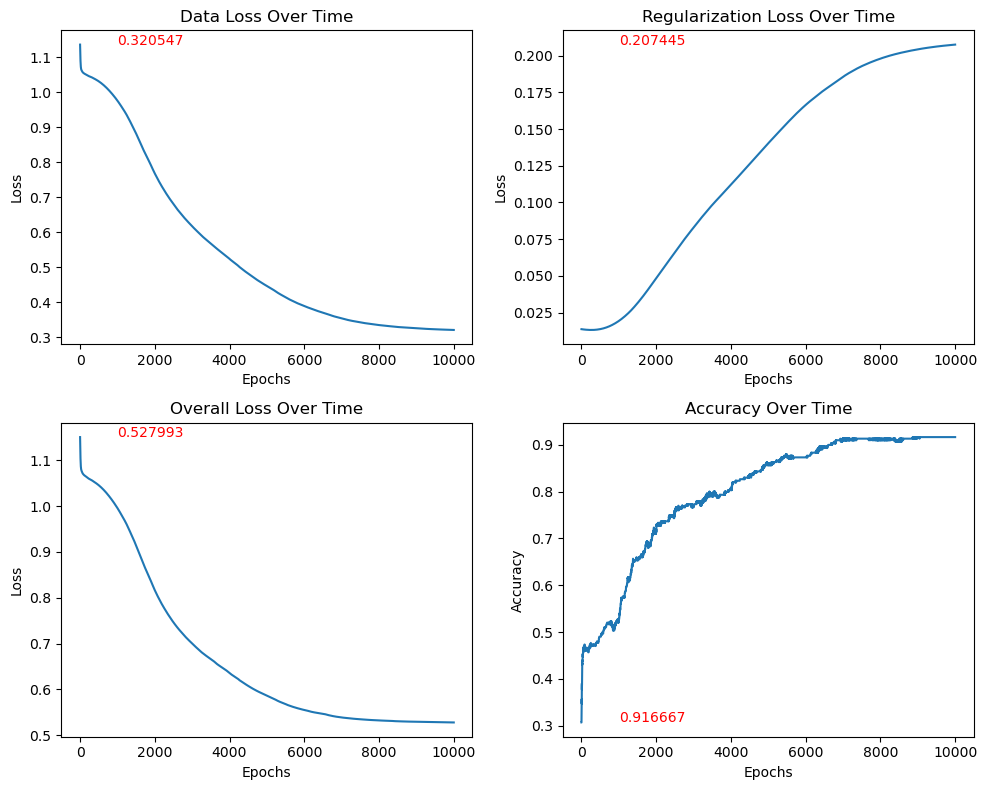

In [60]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64, weight_regularizer_l1=1e-5, bias_regularizer_l1=1e-5, weight_regularizer_l2=1e-4, bias_regularizer_l2=1e-4)
activation1 = ReLU()

dense2 = Dense(64, 3, weight_regularizer_l1=1e-5, bias_regularizer_l1=1e-5, weight_regularizer_l2=1e-4, bias_regularizer_l2=1e-4)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

data_loss_with_time = []
regularization_loss_with_time = []
overall_loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss_activation.forward(dense2.output, y)

    data_loss = loss_activation.loss_value
    regularization_loss = loss_activation.loss.regularization_loss(dense1) + \
                          loss_activation.loss.regularization_loss(dense2)
    overall_loss = data_loss + regularization_loss

    data_loss_with_time.append(data_loss)
    regularization_loss_with_time.append(regularization_loss)
    overall_loss_with_time.append(overall_loss)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# --- Plot 1: Data Loss ---
axs[0, 0].plot(range(10001), data_loss_with_time)
axs[0, 0].annotate(f"{data_loss_with_time[-1]:.6f}", (1000, max(data_loss_with_time)), color='red')
axs[0, 0].set_title("Data Loss Over Time")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")

# --- Plot 2: Regularization Loss ---
axs[0, 1].plot(range(10001), regularization_loss_with_time)
axs[0, 1].annotate(f"{regularization_loss_with_time[-1]:.6f}", (1000, max(regularization_loss_with_time)), color='red')
axs[0, 1].set_title("Regularization Loss Over Time")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Loss")

# --- Plot 3: Overall Loss ---
axs[1, 0].plot(range(10001), overall_loss_with_time)
axs[1, 0].annotate(f"{overall_loss_with_time[-1]:.6f}", (1000, max(overall_loss_with_time)), color='red')
axs[1, 0].set_title("Overall Loss Over Time")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")

# --- Plot 4: Accuracy ---
axs[1, 1].plot(range(10001), accuracy_with_time)
axs[1, 1].annotate(f"{accuracy_with_time[-1]:.6f}", (1000, min(accuracy_with_time)), color='red')
axs[1, 1].set_title("Accuracy Over Time")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")

# Auto-layout to prevent overlapping
plt.tight_layout()
plt.show()

In [85]:
# Testing the new model with L1 + L2 regularization
X_test, y_test = spiral_data(classes=3, samples=100)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss_activation.forward(dense2.output, y_test)

print("validation")
print("loss:", loss_activation.loss_value)
print("accuracy: ", calculate_accuracy(loss_activation.output, y_test))

validation
loss: 0.5349897431317855
accuracy:  0.8033333333333333


### 5. Dropout Layers

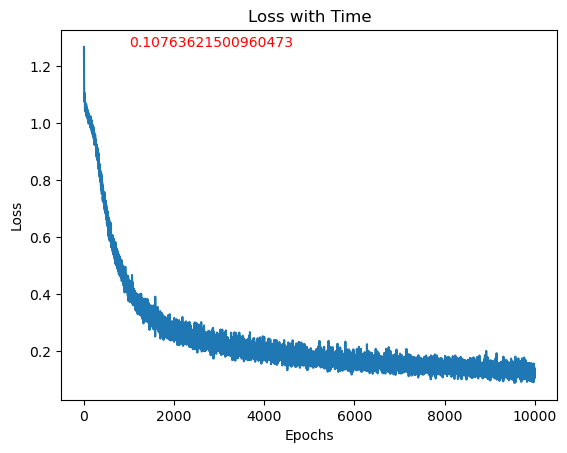

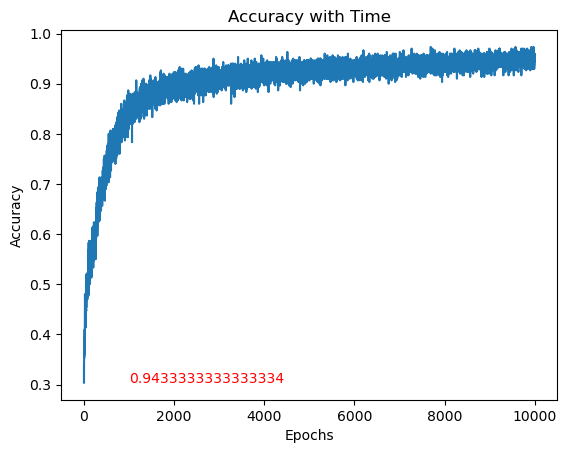

In [47]:
 X, y = spiral_data(classes=3, samples=100)

learning_rate = 0.001
epochs = 10001

dense1 = Dense(2, 64)
activation1 = ReLU()
dropout1 = Dropout(0.1)

dense2 = Dense(64, 128)
activation2 = ReLU()
dropout2 = Dropout(0.1)

dense3 = Dense(128, 3)
loss_activation = CategoricalCrossEntropy()

optimizer = Adam(lr=learning_rate)

loss_with_time = []
accuracy_with_time = []

for epoch in range(epochs):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dropout1.forward(activation1.output)
    dense2.forward(dropout1.output)
    activation2.forward(dense2.output)
    dropout2.forward(activation2.output)
    dense3.forward(dropout2.output)
    loss_activation.forward(dense3.output, y)

    loss_with_time.append(loss_activation.loss_value)
    accuracy_with_time.append(calculate_accuracy(loss_activation.output, y))
    
    loss_activation.backward(loss_activation.output, y)
    dense3.backward(loss_activation.dinputs)
    dropout2.backward(dense3.dinputs)
    activation2.backward(dropout2.dinputs)
    dense2.backward(activation2.dinputs)
    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()

plt.annotate(loss_with_time[-1], xy=(1000, max(loss_with_time)), color='red')
plt.plot(range(epochs), loss_with_time)
plt.title('Loss with Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.annotate(accuracy_with_time[-1], xy=(1000, min(accuracy_with_time)), color='red')
plt.plot(range(epochs), accuracy_with_time)
plt.title('Accuracy with Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [125]:
# Testing the new model with dropout layers
X_test, y_test = spiral_data(classes=3, samples=100)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
loss_activation.forward(dense3.output, y_test)

print("validation")
print("loss:", loss_activation.loss_value)
print("accuracy: ", calculate_accuracy(loss_activation.output, y_test))

validation
loss: 0.4393140599001618
accuracy:  0.8733333333333333


## Note: for this particular dataset, dropout on a single hidden layer didn't really work, hence 2 hidden layers